In [1]:
#Benchmark performance of NER tagging method using HW2 solution code
from collections import defaultdict

from ast import literal_eval
from tqdm import tqdm

from hmm import *
import pandas as pd

In [2]:
train_text_df = pd.read_csv('./train_NER.csv')
train_text_df.entities = train_text_df.entities.apply(lambda x: literal_eval(x) )
train_text_df

,id,text,entities
0,3321A3E87AD3,I do agree that some students would benefit fr...,"[B-Lead, I-Lead, I-Lead, I-Lead, I-Lead, I-Lea..."
1,DFEAEC512BAB,Should students design a summer project for sc...,"[O, O, O, O, O, O, O, O, B-Position, I-Positio..."
2,2E4AFCD3987F,"Dear State Senator\n\n,\n\nIn the ruels of vot...","[O, O, O, O, B-Position, I-Position, I-Positio..."
3,EB6C2AF20BFE,People sometimes have a different opinion than...,"[B-Lead, I-Lead, I-Lead, I-Lead, I-Lead, I-Lea..."
4,A91A08E523D5,"Dear senator,\n\nAs you know the Electoral Col...","[O, O, B-Lead, I-Lead, I-Lead, I-Lead, I-Lead,..."
...,...,...,...
15589,1C899F124FEB,While some students may think it's a beneficia...,"[B-Lead, I-Lead, I-Lead, I-Lead, I-Lead, I-Lea..."
15590,4453444AF383,There has been a strong arguement going on wea...,"[B-Lead, I-Lead, I-Lead, I-Lead, I-Lead, I-Lea..."
15591,EF0D75BF48DA,I favor in to changing election by popular vot...,"[B-Position, I-Position, I-Position, I-Positio..."
15592,8FFDA5B9D359,Do you think students would benefit from being...,"[B-Position, I-Position, I-Position, I-Positio..."


In [3]:
#Now, we'll just put this is the same format as the HW2 notebook 
'''
    [
    [[word1, tag1], [word2, tag2], [word3, tag3]],                #for document 1
    [[word1, tag1], [word2, tag2]],                               #for document 2  
    [[word1, tag1], [word2, tag2], [word3, tag3], [word4, tag4]]  #for document 3
    ]
'''




formatted_data = []

print(len(train_text_df.index))
for index, row in train_text_df.iterrows():
    if(index % 1000 == 0):
        print(index, end =", ")
    
    text = row['text']
    tags = row['entities']
    

    words = row['text'].split()
    
    document_data = []
    for word, tag, in zip(words, tags):
        document_data.append([word, tag])
        
    formatted_data.append(document_data)


15594
0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 

In [4]:
print(len(formatted_data))
print(formatted_data[0:3])

15594
[[['I', 'B-Lead'], ['do', 'I-Lead'], ['agree', 'I-Lead'], ['that', 'I-Lead'], ['some', 'I-Lead'], ['students', 'I-Lead'], ['would', 'I-Lead'], ['benefit', 'I-Lead'], ['from', 'I-Lead'], ['online', 'I-Lead'], ['classes,', 'I-Lead'], ['but', 'I-Lead'], ['not', 'I-Lead'], ['all', 'I-Lead'], ['of', 'I-Lead'], ['them', 'I-Lead'], ['would.', 'I-Lead'], ["There's", 'I-Lead'], ['people', 'I-Lead'], ['that', 'I-Lead'], ['learn', 'I-Lead'], ['better', 'I-Lead'], ['if', 'I-Lead'], ['they', 'I-Lead'], ['are', 'I-Lead'], ['in', 'I-Lead'], ['a', 'I-Lead'], ['classroom', 'I-Lead'], ['with', 'I-Lead'], ['a', 'I-Lead'], ['teacher', 'I-Lead'], ['standing', 'I-Lead'], ['in', 'I-Lead'], ['front', 'I-Lead'], ['of', 'I-Lead'], ['them.', 'I-Lead'], ["There's", 'I-Lead'], ['also', 'I-Lead'], ['people', 'I-Lead'], ['who', 'I-Lead'], ['struggle', 'I-Lead'], ['to', 'I-Lead'], ['listen', 'I-Lead'], ['correctly', 'I-Lead'], ['in', 'I-Lead'], ['the', 'I-Lead'], ['classroom.', 'I-Lead'], ['Those', 'I-Lead'], [

In [5]:
num_data = len(formatted_data)
#formatted_data = formatted_data[0:1000]
train_percent = 0.8
val_percent = 0.1
test_percent = 0.1

train = formatted_data[0:int(train_percent*num_data) - 1]
val = formatted_data[int(train_percent*num_data - 1): -int(test_percent*num_data)+1]
test = formatted_data[-int(test_percent*num_data)+1: ]

print(len(train), "in the training set,", len(val), "in the validation set and", len(test), "in the test set")

12474 in the training set, 1562 in the validation set and 1558 in the test set


# Dataset Statistics

In [6]:
!pip install readability

In [7]:
import matplotlib.pyplot as plt
import readability
from nltk.tokenize import word_tokenize, sent_tokenize

## Get Distribution of the classes

{'Evidence': 3535246, 'Claim': 874309, 'Conclusion': 827871, 'Lead': 483375, 'O': 305458, 'Position': 281275, 'Counterclaim': 139782, 'Rebuttal': 121782}
0.5381630780968711


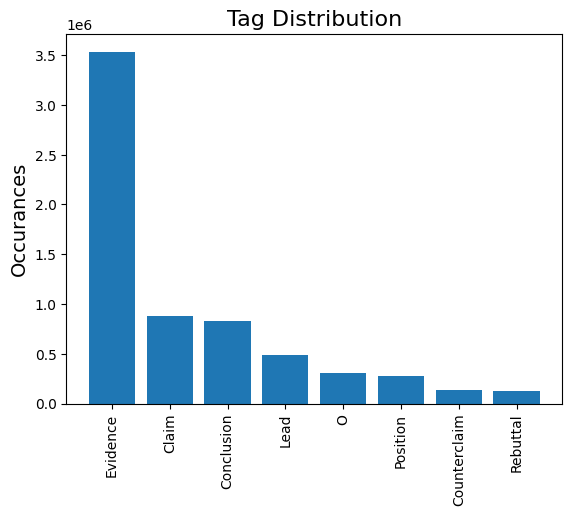

In [8]:
from collections import defaultdict

tag_distribution = defaultdict(int)

for index, row in train_text_df.iterrows():
    for tag in row['entities']:
        if (tag != 'O'):
            tag = tag[2:]
        
        if (tag == 'Concluding Statement'):
            tag = "Conclusion"
        tag_distribution[tag] += 1

tag_distribution = dict(sorted(tag_distribution.items(), key=lambda x: x[1], reverse=True))

        
#Plot
labels = list(tag_distribution.keys())
values = list(tag_distribution.values())

plt.ylabel('Occurances', size=14)
plt.title('Tag Distribution', size=16)

# Create bar chart
plt.bar(labels, values)
plt.xticks(rotation=90)
print(tag_distribution)
summatuion = np.array(list(tag_distribution.values())).sum()
print(3535246 / summatuion)

## Num Sentences Per Essay

In [9]:
def preprocess_essay(essay):
    out = ""
    sentences = sent_tokenize(essay)
    for sentence in sentences:
        for word in word_tokenize(sentence):
            word = word.lower()
            out += word + " "
        #out = out[:-1]
        out += "\n"
    return out


readability_scores = []
num_sentences = []
words_per_sentence = []

for index, row in train_text_df.iterrows():
    if (index % 1000 == 0):
        print(index, end=", ")
    text = preprocess_essay(row['text'])
    results = readability.getmeasures(text, lang='en')
    
    
    if results['readability grades']['FleschReadingEase'] < 0:
        continue
    else:
        readability_scores.append(results['readability grades']['FleschReadingEase'])
        
    num_sentences.append(results['sentence info']['sentences'])
    words_per_sentence.append(results['sentence info']['words_per_sentence'])

avg_readability = np.array(readability_scores).mean()

0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 

In [10]:
avg_num_sentences = np.array(num_sentences).mean()
avg_words_per_sentence = np.array(words_per_sentence).mean()

print("avg_readability", avg_readability)
print("avg_num_sentences", avg_num_sentences)
print("avg_words_per_sentence", avg_words_per_sentence)

x = np.array(readability_scores)
print(x.min())


avg_readability 70.8012667178991
avg_num_sentences 21.065049543173338
avg_words_per_sentence 21.850750501857476
1.4580882352941416


## From now on it's straight up HW2

## Frequency count

In [11]:
hmm = HMMNER()
hmm.get_counts(train)

## Get NER tags and vocabulary

In [12]:
hmm.get_lists()

## Get probabilities

In [13]:
initial_k, transition_k, emission_k = 1, 1, 0.5

hmm.get_probabilities(initial_k, transition_k, emission_k)

In [14]:
beam_width = 3
sample_sentences = [text]
results = hmm.predict_ner_all(sample_sentences, beam_width)
print(results)

[['B-Position', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [15]:
predicted_tag_sequences, true_tag_sequences, accuracy = hmm.test(0.1, 0.1, 0.1, 5, test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5674372810465498


In [16]:
predicted_all = []
true_all = []

for essay in predicted_tag_sequences:
    for word in essay:
        word = word.replace("B-", "")
        word = word.replace("I-", "")
        predicted_all.append(word)

for essay in true_tag_sequences:
    for word in essay:
        word = word.replace("B-", "")
        word = word.replace("I-", "")
        true_all.append(word)

print(len(predicted_all))
print(len(true_all))

655105
655105


In [17]:

dic = defaultdict(int)

for word in predicted_all:
    dic[word] += 1

print(dic.keys())

dict_keys(['Lead', 'O', 'Position', 'Claim', 'Evidence', 'Concluding Statement', 'Rebuttal', 'Counterclaim'])


In [18]:

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


labels = ['Lead', 'O', 'Position', 'Claim', 'Evidence', 'Concluding Statement', 'Rebuttal', 'Counterclaim']
mat = sklearn.metrics.confusion_matrix(true_all, predicted_all, labels=labels)
mat = np.array(mat)



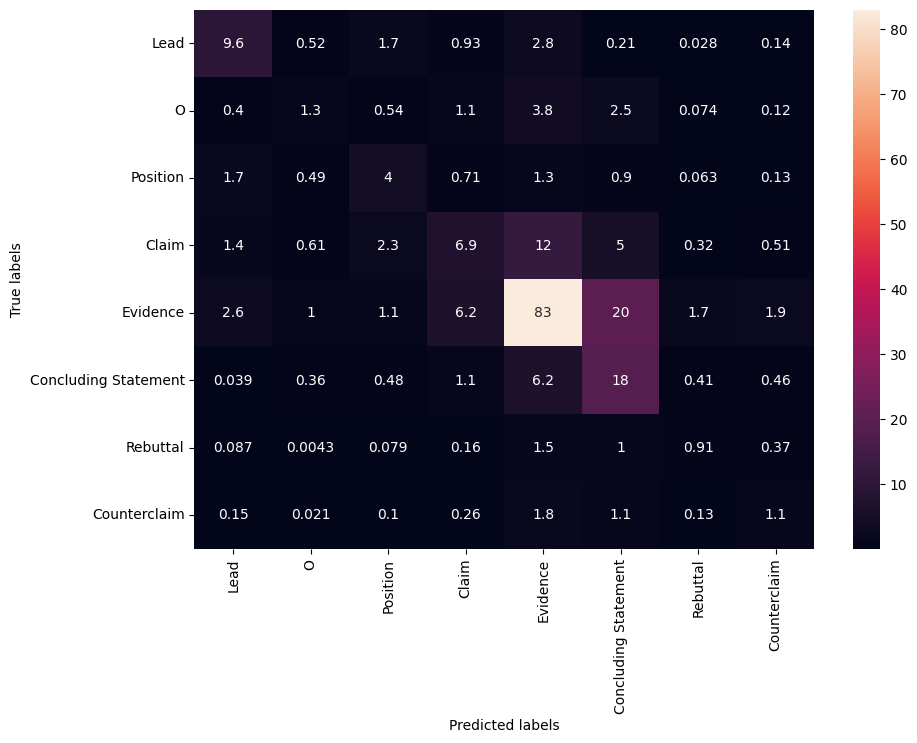

In [19]:
array = mat /3000
df_cm = pd.DataFrame(array, index=labels, columns=labels)

plt.figure(figsize = (10,7))
ax= plt.subplot()

sn.heatmap(df_cm, annot=True)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 



In [20]:
#Get the macro f1 score
sklearn.metrics.f1_score(true_all, predicted_all, labels=labels, average='macro')

0.3947157985862977

In [42]:
text = """To our principal:

I think that cell phones during school should be aloud but only during free periods. So i support policy 1.

This policy is considerable and is much more fair to students then policy 2 because you would at least allow students to bring in cell phones and use them during appropriate times in the day regardless to just cutting them off completely. So as a student i think we should be remotely thankful for the 1st policy to even be an option because of the way we tortured our privileges using them in school.

If you didn't bring this out to the public and made the decision on your own to just stick with policy 2 then there would be some problems with the students because this similar situation happened at SCHOOL_NAME and the students there ended up protesting because they wanted a say in what they should be able to do. So i like the way you are being fair and letting us tell you how we think it should be.

Policy 1 is the better selection anyway because this way you keep your students happier and i don't see a problem on letting kids use there cell phones during free periods/lunch periods because these wont completely distract them during a period like this.

If you ended up choosing policy 2 don't think students would kick back and just listen to that rule. I guarantee students would end up still bringing there cell phones to school and using them when their not supposed to. If they where aloud like in policy 1 then students wouldn't try as much to sneak them in because they know that they'll be able to use/check them at some point in the day.

So don't make it hard on us and just choose option 1 because i promise you things will be better off that way."""

In [43]:
text

"To our principal:\n\nI think that cell phones during school should be aloud but only during free periods. So i support policy 1.\n\nThis policy is considerable and is much more fair to students then policy 2 because you would at least allow students to bring in cell phones and use them during appropriate times in the day regardless to just cutting them off completely. So as a student i think we should be remotely thankful for the 1st policy to even be an option because of the way we tortured our privileges using them in school.\n\nIf you didn't bring this out to the public and made the decision on your own to just stick with policy 2 then there would be some problems with the students because this similar situation happened at SCHOOL_NAME and the students there ended up protesting because they wanted a say in what they should be able to do. So i like the way you are being fair and letting us tell you how we think it should be.\n\nPolicy 1 is the better selection anyway because this wa